## Writing and running programs in TensorFlow has the following steps:
1. Create Tensors (variables) that are not yet executed/evaluated.
2. Write operations between those Tensors.
3. Initialize your Tensors.
4. Create a Session.
5. Run the Session. This will run the operations you'd written above.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
print(('Your TensorFlow version: {0}').format(tf.__version__))

Your TensorFlow version: 2.3.0


In [3]:
data= pd.read_csv('data/iris.csv')

In [4]:
X= data.drop(['Id','Species'],axis=1)
y= data['Species'].map({'Iris-virginica':0,'Iris-versicolor':1,'Iris-setosa':2})

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_x,val_x,train_y,val_y= train_test_split(X,y)

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
#1st dense layer is actually the second layer, we don't explict;y write the first layer
# Dense: Fully Connected layers
model= Sequential([
    Dense(units=16, input_shape=(4,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=3, activation='softmax')
          ])

In [25]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_13 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 99        
Total params: 723
Trainable params: 723
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
model.fit(
    x= train_x,
    y= train_y,
    batch_size = 10,
    epochs=30,
    shuffle=True,
    verbose=True
)

Epoch 1/30
12/12 [==============================] - 0s 1ms/step - loss: 0.2611 - accuracy: 0.9554
Epoch 2/30
12/12 [==============================] - 0s 2ms/step - loss: 0.2536 - accuracy: 0.9732
Epoch 3/30
12/12 [==============================] - 0s 2ms/step - loss: 0.2473 - accuracy: 0.9643
Epoch 4/30
12/12 [==============================] - 0s 2ms/step - loss: 0.2460 - accuracy: 0.9821
Epoch 5/30
12/12 [==============================] - 0s 2ms/step - loss: 0.2582 - accuracy: 0.8929
Epoch 6/30
12/12 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 0.9643
Epoch 7/30
12/12 [==============================] - 0s 2ms/step - loss: 0.2225 - accuracy: 0.9643
Epoch 8/30
12/12 [==============================] - 0s 2ms/step - loss: 0.2210 - accuracy: 0.9732
Epoch 9/30
12/12 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.9732
Epoch 10/30
12/12 [==============================] - 0s 2ms/step - loss: 0.2100 - accuracy: 0.9821
Epoch 11/30
12/12 [

In [31]:
model.evaluate(x= val_x,y= val_y,batch_size=10)

4/4 [==============================] - 0s 1ms/step - loss: 0.1685 - accuracy: 0.9474


[0.16852200031280518, 0.9473684430122375]

In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_13 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 99        
Total params: 723
Trainable params: 723
Non-trainable params: 0
_________________________________________________________________


## MNIST dataset

In [4]:
train= pd.read_csv('data/train.csv')
test= pd.read_csv('data/test.csv')

In [13]:
train.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [7]:
X= train.drop('label',axis=1)
y= train['label']

In [11]:
# if we want to flatten out the image
features= X.values.reshape(-1,28,28,1)

Image of 0 :


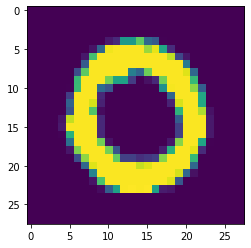

In [14]:
import matplotlib.pyplot as plt
plt.imshow(features[1][:,:,0])
print('Image of {} :'.format(y[1]))

In [15]:
from sklearn.model_selection import train_test_split
train_x,val_x,train_y,val_y= train_test_split(X,y)

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [7]:
model= Sequential([
    Dense(units=16,input_shape=(784,),activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=10, activation='softmax')
])

In [17]:
train_x.shape

(31500, 784)

Loss can be seen as a distance between the true values of the problem and the values predicted by the model. 
Greater the loss is, more huge is the errors you made on the data.

Accuracy can be seen as the number of error you made on the data.

That means :
- a low accuracy and huge loss means you made huge errors on a lot of data
- a low accuracy but low loss means you made little errors on a lot of data
- a great accuracy with low loss means you made low errors on a few data (best case)


In [ ]:
model.

In [ ]:
model.fit(
    x= train_x,
    y= train_y,
    batch_size=10,
    validation_split=0.1,
    epochs=20,
    shuffle=True,
    verbose=True
)